<center>
  <font size="7">Interface Web</font><br>
  <font size="5">Projet 8 - Tableau de bord développé sous <b><i>Linux</b></i> </font>
</center>
<div align="right">
  <font size="4"><i>par Jean Vallée</i></font>
</div>

<hr color="lightgreen">

# Initialisation

In [63]:
# pip install --quiet streamlit plotly mlflow xgboost

In [64]:
# pip install --quiet -r ./data/model/requirements.txt

In [315]:
import streamlit as st
import pandas as pd
import numpy as np
import json
import mlflow
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [254]:
dir_in = './data/in/'
dir_out = './data/out/'

# App Web

## Page d'accueil

In [234]:
path_homepage = '🏠_index.py'

In [235]:
ls $path_homepage

Index.py


In [236]:
cat $path_homepage

'''
Index.py
Main page of Streamlit app
'''

import streamlit as st

st.set_page_config(
	page_title="Hello",
	page_icon="👋",
	layout="wide"	
)

# Customize the sidebar
st.sidebar.title("About")
st.sidebar.info("""
	Web App URL: <https://project8-ocr.streamlit.app/>
	GitHub Repository: <https://github.com/JeanRosselVallee/project_8>
	""")
st.sidebar.image("https://www.whenthebanksaysno.co.uk/wp-content/uploads/2023/05/D9585792-ED4C-4363-900E-1EDCE31B99B1.jpeg")

# Customize page title
st.title("Credit Application Dashboard")

st.markdown(
    """
    This multipage app template demonstrates various interactive web apps created using [streamlit](https://streamlit.io) and [leafmap](https://leafmap.org). It is an open-source project and you are very welcome to contribute to the [GitHub repository](https://github.com/giswqs/streamlit-multipage-template).
    """
)

st.header("Instructions")

markdown = """
1. Select a client's application for credit
2. Find your favorite emoji from https:/

## Serveur local

In [237]:
conda env list

# conda environments:
#
base                     /home/user_n/anaconda3
env python 3-10-12       /home/user_n/anaconda3/envs/env python 3-10-12
env_proj_7               /home/user_n/anaconda3/envs/env_proj_7
env_proj_8            *  /home/user_n/anaconda3/envs/env_proj_8
myEnvR                   /home/user_n/anaconda3/envs/myEnvR


Note: you may need to restart the kernel to use updated packages.


### Arrêt

In [613]:
! pkill -f "streamlit"

### Démarrage

In [615]:
shell_command = 'nohup streamlit run ' + path_homepage + ' > ./log/streamlit_app.log 2>&1 &'
print('shell_command =', shell_command)
get_ipython().system_raw(shell_command) # run model API in background

shell_command = nohup streamlit run Index.py > ./log/streamlit_app.log 2>&1 &


### Vérification

In [616]:
! ps aux | grep streamlit | grep -v grep

user_n    132566  5.8  0.2 688352 68960 ?        Sl   13:48   0:01 /home/user_n/anaconda3/envs/env_proj_8/bin/python /home/user_n/anaconda3/envs/env_proj_8/bin/streamlit run Index.py


## Log

In [263]:
! tail ./log/streamlit_app.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   330  100    37  100   293   1608  12739 --:--:-- --:--:-- --:--:-- 14347
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   330  100    37  100   293    755   5979 --:--:-- --:--:-- --:--:--  6734
/home/user_n/anaconda3/envs/env_proj_8/lib/python3.10/site-packages/shap/plots/_beeswarm.py:952: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



# Jeu de données

Les prédictions se feront sur le jeu de test parce que le modèle a été entraîné sur celui d'entraînement

In [71]:
ls ../project_7/modeling/data/out/*test_2.csv ../project_7/modeling/data/out/*pred*.csv

../project_7/modeling/data/out/X_test_2.csv
../project_7/modeling/data/out/y_pred_4.csv
../project_7/modeling/data/out/y_test_2.csv


In [72]:
cp ../project_7/modeling/data/out/*_test_2.csv ./data/in/

In [73]:
cp ../project_7/test_api/data/li_features.txt ./data/in/

In [74]:
ls ./data/in/

config.json      model_optimal_simplified.json  X_TP.csv
data.csv         X_test_2.csv                   y_pred_4.csv
li_features.txt  X_TN.csv                       y_test_2.csv


In [75]:
! for file_i in ./data/in/* ; do wc -l $file_i ; done

8 ./data/in/config.json
48679 ./data/in/data.csv
1 ./data/in/li_features.txt
0 ./data/in/model_optimal_simplified.json
48679 ./data/in/X_test_2.csv
33121 ./data/in/X_TN.csv
2359 ./data/in/X_TP.csv
48679 ./data/in/y_pred_4.csv
48679 ./data/in/y_test_2.csv


### Chargement

In [19]:
def load_data(file):
    df_contents = pd.read_csv(file)   .rename(columns={'Unnamed: 0': 'request_id'}) \
                                      .set_index('request_id')
    return df_contents

#### Attributs

In [20]:
path_X = dir_in + 'X_test_2.csv'
df_X = load_data(path_X)
df_X.shape

(48678, 125)

In [21]:
with open(dir_in + 'li_features.txt') as f :
    str_li_features = f.read()
li_features = eval(str_li_features)
li_features

['CODE_GENDER_M',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'NAME_EDUCATION_TYPE_Secondary_or_secondary_special',
 'NAME_EDUCATION_TYPE_Higher_education',
 'NAME_CONTRACT_TYPE_Cash_loans',
 'NAME_INCOME_TYPE_Working']

In [22]:
df_X = df_X[li_features]
display(df_X.head(1))
df_X.shape

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working
request_id,,,,,,,
155094,0,0.770087,0.607697,0,1,1,0


(48678, 7)

#### Matrice de corrélation

In [281]:
def mask_upper_triangle(df_in) :
    ''' Fills a diagonal and the upper half with NaNs '''
    mask = np.zeros_like(df_in, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    df_in[mask] = np.nan
    return df_in

In [289]:
threshold_hide_low = 0.1
df_correlation_matrix = df_X.corr()
df_correlation_matrix[np.abs(df_correlation_matrix)<=threshold_hide_low] = 0
li_correlated_cols = list(df_correlation_matrix  .columns[(abs(df_correlation_matrix).sum()>1)])
mask_upper_triangle(df_correlation_matrix.loc[li_correlated_cols, li_correlated_cols]) \
              .style.format('{:.1f}').background_gradient(axis=None, cmap='RdYlGn')

,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_INCOME_TYPE_Working
EXT_SOURCE_3,nan,nan,nan,nan,nan
EXT_SOURCE_2,0.1,nan,nan,nan,nan
NAME_EDUCATION_TYPE_Secondary_or_secondary_special,0.0,-0.1,nan,nan,nan
NAME_EDUCATION_TYPE_Higher_education,0.0,0.1,-0.9,nan,nan
NAME_INCOME_TYPE_Working,0.0,0.0,0.2,-0.2,nan


In [288]:
df_correlation_matrix = df_X.corr()
mask_upper_triangle(df_correlation_matrix) \
                .style.format('{:.1f}').background_gradient(axis=None, cmap='RdYlGn') \
                .set_properties(**{'color': 'black'})#.text_gradient(cmap='black')

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working
CODE_GENDER_M,nan,nan,nan,nan,nan,nan,nan
EXT_SOURCE_3,-0.0,nan,nan,nan,nan,nan,nan
EXT_SOURCE_2,-0.0,0.1,nan,nan,nan,nan,nan
NAME_EDUCATION_TYPE_Secondary_or_secondary_special,0.0,0.0,-0.1,nan,nan,nan,nan
NAME_EDUCATION_TYPE_Higher_education,-0.0,-0.0,0.1,-0.9,nan,nan,nan
NAME_CONTRACT_TYPE_Cash_loans,0.0,-0.0,-0.0,0.1,-0.1,nan,nan
NAME_INCOME_TYPE_Working,0.0,-0.0,-0.1,0.2,-0.2,0.0,nan


In [305]:
df_correlation_matrix.loc['NAME_EDUCATION_TYPE_Higher_education']['NAME_EDUCATION_TYPE_Secondary_or_secondary_special']

-0.8991237664959102

In [311]:
df_correlation_matrix.loc[['NAME_EDUCATION_TYPE_Higher_education']][['NAME_EDUCATION_TYPE_Secondary_or_secondary_special']]

,NAME_EDUCATION_TYPE_Secondary_or_secondary_special
NAME_EDUCATION_TYPE_Higher_education,-0.899124


In [316]:
df_correlation_matrix = df_X.corr()
df_correlation_matrix.loc[['NAME_EDUCATION_TYPE_Higher_education']][['NAME_EDUCATION_TYPE_Secondary_or_secondary_special']] \
                .style.format('{:.1f}').background_gradient(axis=None, cmap='RdYlGn')
                #.set_properties(**{'color': 'black'})

,NAME_EDUCATION_TYPE_Secondary_or_secondary_special
NAME_EDUCATION_TYPE_Higher_education,-0.9


#### Cible

In [23]:
path_y = dir_in + 'y_test_2.csv'
df_y = load_data(path_y)
df_y.shape
display(df_y.head(1))

,TARGET
request_id,
155094,0


### Jointure d'attributs et cible

In [261]:
li_features_simplified  = ['male', 'score_A', 'score_B', 'edu_level_2', 'edu_level_3', 'cash_loan', 'employee']
li_variables_simplified = li_features_simplified + ['class']

In [24]:
df_data = df_X.join(df_y)
#df_data.columns = li_variables_simplified

In [25]:
display(df_data.head(1))
df_data.shape

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working,TARGET
request_id,,,,,,,,
155094,0,0.770087,0.607697,0,1,1,0,0


(48678, 8)

### Distribution d'attributs par classe

#### Observations de classe 0

In [506]:
df_data_0 = df_data[df_data['TARGET']==0]
df_data_1 = df_data[df_data['TARGET']==1]
df_data_0.head(1)

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working,TARGET
request_id,,,,,,,,
155094,0,0.770087,0.607697,0,1,1,0,0


Text(0.5, 0, 'EXT_SOURCE_3')

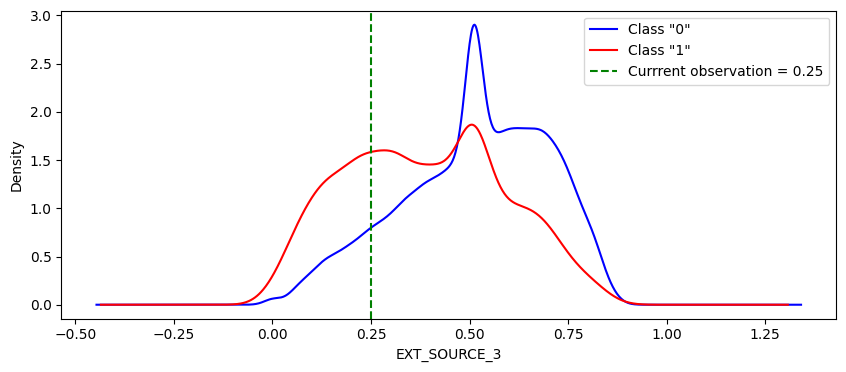

In [507]:
x_curr = 0.25
str_feature = 'EXT_SOURCE_3'
fig, ax = plt.subplots(figsize=(10, 4))
df_data_0[str_feature].plot.kde(ax=ax, color='blue', label='Class "0"')
df_data_1[str_feature].plot.kde(ax=ax, color='red' , label='Class "1"')
ax.axvline(x=x_curr, color='green', linestyle='--', label=f'Currrent observation = {x_curr}')
ax.legend()
ax.set_xlabel(str_feature)

### Sauvegarde

In [82]:
df_data.to_csv(dir_in + 'data.csv')

In [83]:
ls $dir_in/data.csv

./data/in//data.csv


In [88]:
! head -n 3 $dir_in/data.csv

request_id,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working,TARGET
155094,0,0.7700870700124128,0.6076973714617412,0,1,1,0,0
74108,0,0.4258928980051529,0.7318427244611323,1,0,1,1,0


# Score normalisé

L'affichage sur la jauge a besoin d'un score normalisé par rapport au seuil entre les 2 classes:
|score original|score normalisé|
|--|--|
|0|0|
|seuil S|0.5|
|1|1|

On obtient ces résultats en élévant le score à la puissance P

$$ T ^ P = 0.50 \quad \quad \quad \text{where T : threshold} $$
$$ \Rightarrow \quad P = \frac{\log_{2}(0.50)}{\log_{2}(threshold)} = -\frac{1}{\log_{2}(threshold)} $$


In [7]:
def get_normalizing_power(threshold) :
	normalizing_power = - 1 / np.log2(threshold)
	return normalizing_power

# Modèle adapté

In [8]:
from xgboost import XGBClassifier

## Classe du modèle

Le score renvoyé est la probabilité qu'un emprunteur ne rembourse pas (classe "1")

In [125]:
class XGB_prob(XGBClassifier):
    threshold = 0 
    def __init__(self, threshold=0.5, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
    def fit(self, df_X_train, df_y_train, **kwargs) : 
        super().fit(df_X_train, df_y_train, **kwargs)
    def predict(self, df_X_subset, bool_save_events=True):      
        np_y_pred_proba = super().predict_proba(df_X_subset)[:, 1]  # class 1 probas  
        np_y_normalized = np.power(np_y_pred_proba, get_normalizing_power(self.threshold))
        return np_y_normalized

## Récupération

On importe le modèle de prédiction le plus récent: celui deployé en pré-Prod car celui en Prod est absent du dépôt Git

In [126]:
path_config = '../config.json' 

In [127]:
# cp ../project_7/config.json ./data/in/

In [128]:
# cp ../project_7/modeling/data/out/model_optimal_simplified.json ./data/in/

In [129]:
model_prob = XGB_prob()
model_prob.load_model(dir_in + 'model_optimal_simplified.json')
model_prob

XGB_prob(base_score='1.572525E-1', booster='gbtree', callbacks=None,
         colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
         device=None, early_stopping_rounds=None, enable_categorical=False,
         eval_metric=None,
         feature_types=['int', 'float', 'float', 'int', 'int', 'int', 'int'],
         gamma=None, grow_policy=None, importance_type=None,
         interaction_constraints=None, learning_rate=None, max_bin=None,
         max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
         max_depth=None, max_leaves=None, min_child_weight=None, missing=nan,
         monotone_constraints=None, multi_strategy=None, n_estimators=None,
         n_jobs=None, num_parallel_tree=None, objective='binary:logistic', ...)

### Génération de signature

In [130]:
from mlflow.models.signature import infer_signature

In [131]:
model_signature = infer_signature(df_X.head(1), df_y.head(1))

/home/user_n/anaconda3/envs/env_proj_8/lib/python3.10/site-packages/mlflow/types/utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


#### Attributs

In [132]:
list(model_signature.inputs)[:10]

['CODE_GENDER_M': long (required),
 'EXT_SOURCE_3': double (required),
 'EXT_SOURCE_2': double (required),
 'NAME_EDUCATION_TYPE_Secondary_or_secondary_special': long (required),
 'NAME_EDUCATION_TYPE_Higher_education': long (required),
 'NAME_CONTRACT_TYPE_Cash_loans': long (required),
 'NAME_INCOME_TYPE_Working': long (required)]

#### Cible

In [133]:
list(model_signature.outputs)

['TARGET': long (required)]

### Mise à jour du seuil binaire

In [134]:
dict_params_old = model_prob.get_params()
dict_params_old['threshold']

0.5

In [135]:
with open(dir_in + 'config.json', 'r') as json_file: dict_to_config = json.load(json_file)
best_threshold = float(dict_to_config['best_threshold'])

In [136]:
setattr(model_prob, 'threshold', best_threshold)

In [137]:
dict_params_new = model_prob.get_params()
dict_params_new['threshold']

0.09

## Déploiement

In [138]:
from mlflow import sklearn as skl

In [139]:
model_path = './data/model/'
! rm -rf $model_path ; mkdir -p "$model_path"
%time skl.save_model(model_prob, model_path, signature=model_signature)

CPU times: user 69 ms, sys: 7.57 ms, total: 76.6 ms
Wall time: 2 s


/home/user_n/anaconda3/envs/env_proj_8/lib/python3.10/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/user_n/anaconda3/envs/env_proj_8/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


#### Fichiers générés

In [140]:
!find "$model_path"

./data/model/
./data/model/conda.yaml
./data/model/python_env.yaml
./data/model/MLmodel
./data/model/model.pkl
./data/model/requirements.txt


### Prédictions

In [456]:
np_y_pred_proba = model_prob.predict(df_X)

In [457]:
np_y_pred_proba

array([0.32588145, 0.4276271 , 0.4159582 , ..., 0.31557882, 0.49494374,
       0.53514314], dtype=float32)

In [461]:
np.save(dir_out + 'y_pred_proba', np_y_pred_proba)

In [464]:
np.load(dir_out + 'y_pred_proba.npy')
df_y_pred

,TARGET
request_id,
0,0
1,0
2,0
3,1
4,0
...,...
48673,0
48674,0
48675,0


### Nuage de points colorié

In [449]:
def spread_out(df_in, str_A, str_B, radius) :
    df_out_A = df_in[str_A] + np.random.normal(0, radius, size=df_in.shape[0])
    df_out_B = df_in[str_B] + np.random.normal(0, radius, size=df_in.shape[0])
    return df_out_A, df_out_B

In [450]:
df_A , df_B = spread_out(df_X, 
                         'NAME_EDUCATION_TYPE_Higher_education', 
                         'NAME_EDUCATION_TYPE_Secondary_or_secondary_special', 
                         radius = 0.15)

In [451]:
def make_cmap(bottom, low, high, top) : 
    li_colored_levels = [(0, bottom), (0.49, low), (0.51, high), (1, top)]
    return LinearSegmentedColormap.from_list('CustomMap', li_colored_levels)

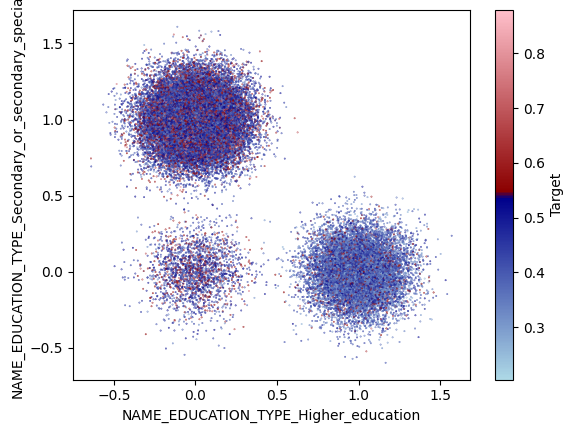

In [467]:
scatter_A_B = plt.scatter(df_A, df_B, c=np_y_pred_proba, s=.1, alpha=1, 
                          cmap=make_cmap('lightblue', 'darkblue', 'darkred', 'pink'))
plt.xlabel(str_x), plt.ylabel(str_y)
cbar = plt.colorbar(scatter_A_B, label='Target')

# Mise en service

## Arrêt

In [141]:
port_server = '5677'

In [142]:
mask = ':' + port_server
! pkill -f "$mask"

[2024-07-09 13:58:36 +0200] [83957] [INFO] Handling signal: term
[2024-07-09 13:58:36 +0200] [83958] [INFO] Worker exiting (pid: 83958)
[2024-07-09 13:58:36 +0200] [83957] [ERROR] Worker (pid:83958) was sent SIGTERM!
[2024-07-09 13:58:36 +0200] [83957] [INFO] Shutting down: Master


## Démarrage

In [244]:
ip_host = '0.0.0.0'
shell_command =  'nohup mlflow models serve -m '
shell_command += model_path + ' -p ' + port_server + ' -h ' + ip_host #+ ' --env-manager=conda'
print(shell_command)
get_ipython().system_raw(shell_command + ' --no-conda &')          # runs model API in background

nohup mlflow models serve -m ./data/model/ -p 5677 -h 0.0.0.0


## Vérification d'exécution

Il y a 2 processus qui tournent par serveur

In [246]:
! ps aux | grep "scoring_server" | grep -v "grep" | awk '{print $2, $15, $19}'

88250 0.0.0.0:5677 mlflow.pyfunc.scoring_server.wsgi:app
88251 0.0.0.0:5677 mlflow.pyfunc.scoring_server.wsgi:app


# Tests

In [110]:
url_api = 'localhost:' + port_server + '/invocations'
print('URL API    -> http://' + url_api)

URL API    -> http://localhost:5677/invocations


## Prédictions

Demande par requête POST de prédiction de la cible pour une observation

In [111]:
#cp ../project_7/modeling/data/out/X_T[PN].csv ./data/in/

In [112]:
nb_observations = 10

### Cas TP

In [146]:
path_TP = dir_in + 'X_TP.csv'
df_TP = pd.read_csv(path_TP)

In [147]:
df_TP_sample = df_TP.sample(nb_observations)
df_TP_sample

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working
1246,1,0.253963,0.560372,1,0,1,0
785,0,0.047601,0.323326,1,0,1,1
2274,1,0.510853,0.131498,1,0,1,1
1838,1,0.252599,0.242306,1,0,1,1
1370,0,0.050979,0.092494,1,0,1,0
1613,1,0.255332,0.559957,1,0,1,1
1379,0,0.185202,0.531853,0,1,1,1
1131,1,0.481249,0.323609,1,0,1,1
1840,1,0.649620,0.105546,1,0,1,1
984,1,0.540654,0.093991,1,0,0,0


In [148]:
def get_curl_command(df_sample, url) :
    str_features_values = df_sample.to_json(orient='split')
    str_data = '\'{"dataframe_split": ' + str_features_values + '}\' '
    return 'curl -d' + str_data + '''-H 'Content-Type: application/json' -X POST ''' + url

Vérifier que cette ligne de commande Linux renvoie une prédiction de classe "1"

In [149]:
shell_command = get_curl_command(df_TP_sample, url_api)
print(shell_command)

curl -d'{"dataframe_split": {"columns":["CODE_GENDER_M","EXT_SOURCE_3","EXT_SOURCE_2","NAME_EDUCATION_TYPE_Secondary_or_secondary_special","NAME_EDUCATION_TYPE_Higher_education","NAME_CONTRACT_TYPE_Cash_loans","NAME_INCOME_TYPE_Working"],"index":[1246,785,2274,1838,1370,1613,1379,1131,1840,984],"data":[[1,0.2539628093,0.5603720398,1,0,1,0],[0,0.0476007352,0.3233264798,1,0,1,1],[1,0.5108529062,0.1314981289,1,0,1,1],[1,0.2525986978,0.2423055372,1,0,1,1],[0,0.0509793334,0.0924938245,1,0,1,0],[1,0.2553317708,0.5599571839,1,0,1,1],[0,0.1852020816,0.5318525577,0,1,1,1],[1,0.4812493411,0.3236088197,1,0,1,1],[1,0.6496203111,0.1055459097,1,0,1,1],[1,0.5406544504,0.0939913796,1,0,0,0]]}}' -H 'Content-Type: application/json' -X POST localhost:5677/invocations


In [150]:
get_ipython().system_raw(shell_command)  

{"predictions": [0.5534035563468933, 0.7374033331871033, 0.6389487981796265, 0.6687805652618408, 0.7843499779701233, 0.5755289196968079, 0.5313180088996887, 0.5661205053329468, 0.5716685056686401, 0.5247530937194824]}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   217  100   678   4931  15409 --:--:-- --:--:-- --:--:-- 20340


### Cas TN

In [151]:
path_TN = dir_in + 'X_TN.csv'
df_TN = pd.read_csv(path_TN)

In [152]:
df_TN_sample = df_TN.sample(nb_observations)
df_TN_sample

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working
28726,0,0.513694,0.671199,1,0,1,1
9356,0,0.463275,0.715923,1,0,1,1
24251,0,0.656158,0.758948,0,1,1,0
31176,1,0.707699,0.367036,1,0,1,1
26053,0,0.432962,0.614909,0,1,1,0
30159,0,0.654529,0.744395,1,0,1,0
13343,0,0.588488,0.491529,0,1,0,1
26266,0,0.776410,0.425121,0,1,1,0
354,0,0.661024,0.476217,1,0,1,1
8663,0,0.665855,0.598748,1,0,1,1


Vérifier que cette ligne de commande Linux renvoie une prédiction de classe "0"

In [153]:
shell_command = get_curl_command(df_TN_sample, url_api)
print(shell_command)

curl -d'{"dataframe_split": {"columns":["CODE_GENDER_M","EXT_SOURCE_3","EXT_SOURCE_2","NAME_EDUCATION_TYPE_Secondary_or_secondary_special","NAME_EDUCATION_TYPE_Higher_education","NAME_CONTRACT_TYPE_Cash_loans","NAME_INCOME_TYPE_Working"],"index":[28726,9356,24251,31176,26053,30159,13343,26266,354,8663],"data":[[0,0.5136937663,0.6711988652,1,0,1,1],[0,0.4632753281,0.7159232202,1,0,1,1],[0,0.656158373,0.7589476174,0,1,1,0],[1,0.7076993447,0.367035797,1,0,1,1],[0,0.4329616671,0.6149092475,0,1,1,0],[0,0.6545292802,0.7443950327,1,0,1,0],[0,0.5884877883,0.491529006,0,1,0,1],[0,0.7764098512,0.4251207017,0,1,1,0],[0,0.6610235391,0.4762169811,1,0,1,1],[0,0.665854922,0.5987476984,1,0,1,1]]}}' -H 'Content-Type: application/json' -X POST localhost:5677/invocations


In [154]:
get_ipython().system_raw(shell_command)  

{"predictions": [0.4005722999572754, 0.419644296169281, 0.2925635278224945, 0.4535232186317444, 0.39870113134384155, 0.3309217691421509, 0.33661720156669617, 0.3511064052581787, 0.4159581959247589, 0.40274977684020996]}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   219  100   682   2546   7930 --:--:-- --:--:-- --:--:-- 10476


# Feature Importance

#### Entraînement

In [66]:
# model_prob.fit(df_X_train_simplified, df_y_train)

## Valeurs Shapley 

In [67]:
# pip install --quiet shap

Note: you may need to restart the kernel to use updated packages.


In [68]:
# pip install --quiet PyQt6

Note: you may need to restart the kernel to use updated packages.


In [69]:
import shap

In [250]:
explainer = shap.TreeExplainer(model_prob)
np_shap_values = explainer.shap_values(df_X)

In [459]:
np.save(dir_out + 'shap_values', np_shap_values)

In [460]:
np.load(dir_out + 'shap_values.npy')

array([[-0.10604649, -0.73416895, -0.15025097, ..., -0.2882225 ,
         0.04021755, -0.10489687],
       [-0.10604649,  0.19571878, -0.69649756, ...,  0.08824793,
         0.04021755,  0.052944  ],
       [-0.10604649, -0.5690576 , -0.03287617, ...,  0.08824793,
         0.04021755,  0.052944  ],
       ...,
       [-0.10604649, -0.5690576 , -0.58699477, ..., -0.2882225 ,
         0.04021755,  0.052944  ],
       [-0.10604649,  0.5163189 , -0.31420535, ...,  0.08824793,
         0.04021755, -0.10489687],
       [-0.10604649, -0.41659302,  0.7622442 , ...,  0.08824793,
         0.04021755,  0.052944  ]], dtype=float32)

## Explicateur d'attributs 

In [267]:
explainer_X = explainer(df_X)

In [268]:
np.save(dir_out + 'explainer_X', explainer_X)

In [271]:
np.load(dir_out + 'explainer_X.npy', allow_pickle=True)

array([[.values =
        -0.10604649

        .base_values =
        -2.4865499

        .data =
        0.0           , .values =
                        -0.73416895

                        .base_values =
                        -2.4865499

                        .data =
                        0.7700870700124128, .values =
                                            -0.15025097

                                            .base_values =
                                            -2.4865499

                                            .data =
                                            0.6076973714617412, ...,
        .values =
        -0.2882225

        .base_values =
        -2.4865499

        .data =
        1.0           , .values =
                        0.04021755

                        .base_values =
                        -2.4865499

                        .data =
                        1.0           , .values =
                                        -0.10489687



In [273]:
import pickle

In [278]:
with open(dir_out + 'explainer_X.pkl', 'wb') as f:
    pickle.dump(explainer_X, f)

In [279]:
with open(dir_out + 'explainer_X.pkl', 'rb') as f:
    loaded_explainer = pickle.load(f)
type(loaded_explainer)

shap._explanation.Explanation

## Importance Globale

- appliqué au jeu de test

### Graphe de violons

**Guide d'analyse des "violons"**
- Les attributs sont triés par ordre d'importance décroissante
- Pour chaque attribut, on indique :
    - la grandeur des valeurs 
        - faibles en bleu
        - importantes en rouge
    - leur distribution par la hauteur des traits
    - leur effet sur le score (axe X)
        - négatif
        - positif

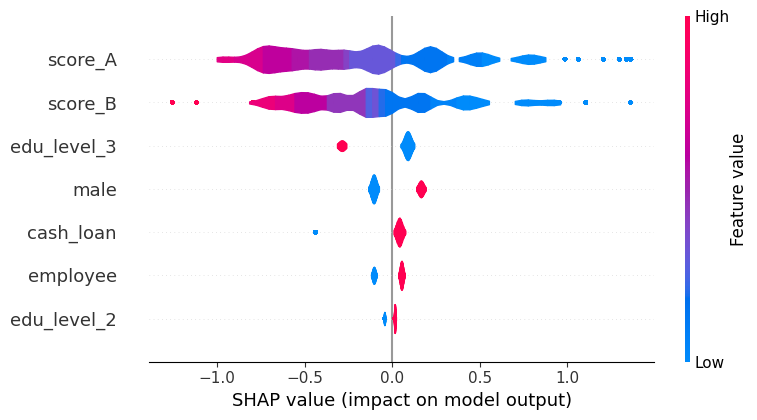

In [509]:
shap.summary_plot(np_shap_values, df_X, feature_names=li_features_simplified, plot_type='violin')

**Interprétation**
1. Effets
    - Les scores fournis par des sources externes sont les plus influents
    - Pour être classé en mauvais emprunteur il faudrait :
        - des valeurs faibles de scores externes 
        - pas d'éducation supérieure
        - être un homme
        - demander un retrait du prêt en espèces
        - être salarié
        - avoir une éducation secondaire
    -  Cas à fort impact négatif 
        -  ne pas demander un retrait en espèces
        -  avoir une éducation supérieure
2. Distribution 
    - Observations majoritaires :        
        - des valeurs fortes de scores fournis par des sources externes 
        - pas d'éducation supérieure
        - des femmes
        - demandes de retrait du prêt en espèces
        - être salarié
        - éducation secondaire

## Importance Locale

### Graphe en cascade d'un échantillon

**Interprétation**

Pour interpréter ce graphe, on se déplace du bas vers le haut :
- on démarre en bas du diagramme avec la valeur de base E(f(x)] en gris 
- on remontant les lignes, on additionne progresivement à cette valeur, les valeurs _SHAP_ de chaque attribut
- les flèches rouges ont un impact positif et les bleues négatif
    - leur taille indique leur importance locale
    - on constate que l'ordre d'importance des attributs varie
- l'addition résultante indique l'appartenance à une classe
    - classe "0", si résultat négatif
    - classe "1", si positif

In [231]:
print('median_predicted_value E[f(x)]=', explainer.expected_value)


median_predicted_value E[f(x)]= -2.4865499


In [168]:
pd.DataFrame(df_X.iloc[idx]).T

,CODE_GENDER_M,EXT_SOURCE_3,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Secondary_or_secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_CONTRACT_TYPE_Cash_loans,NAME_INCOME_TYPE_Working
155094,0.0,0.770087,0.607697,0.0,1.0,1.0,0.0


Expected class= 0
predicted probability= [0.32588145]


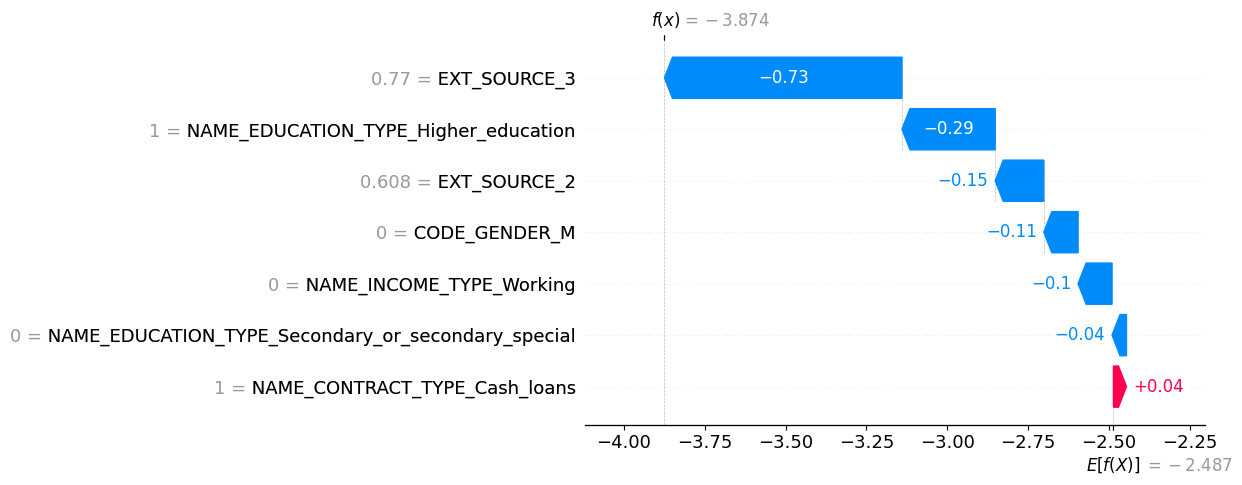

Expected class= 0
predicted probability= [0.4276271]


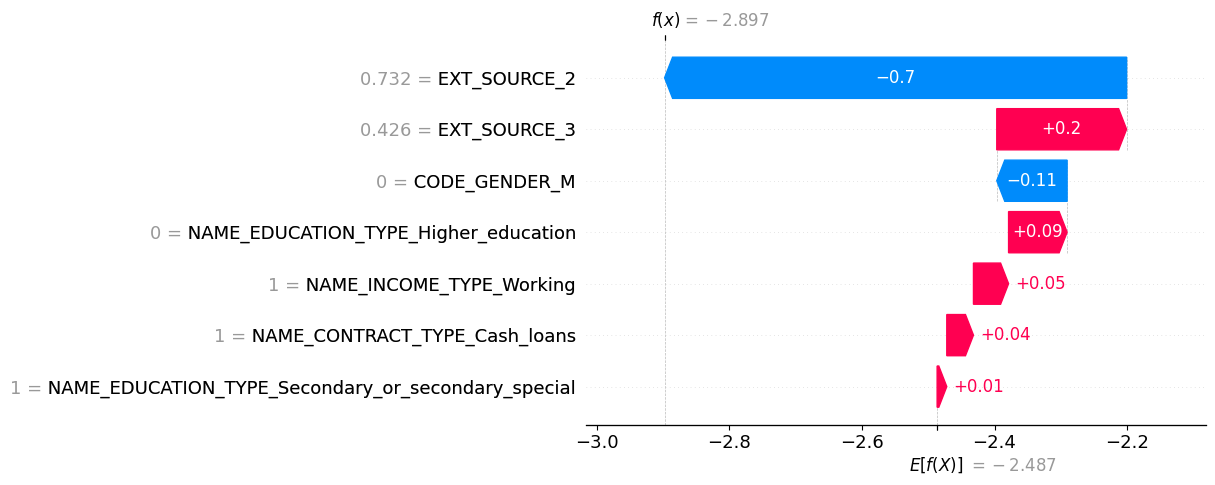

Expected class= 0
predicted probability= [0.4159582]


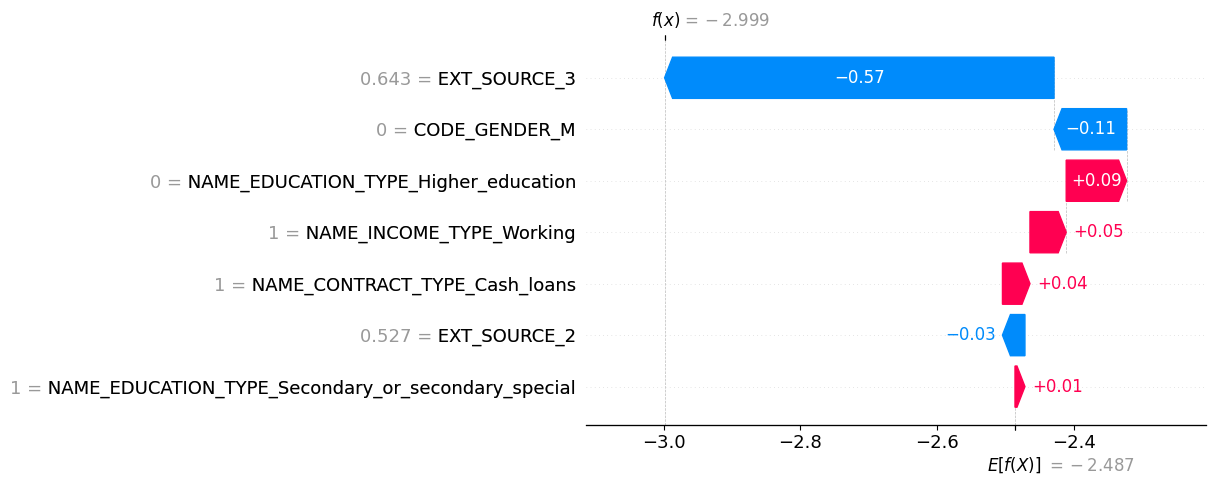

Expected class= 1
predicted probability= [0.6140911]


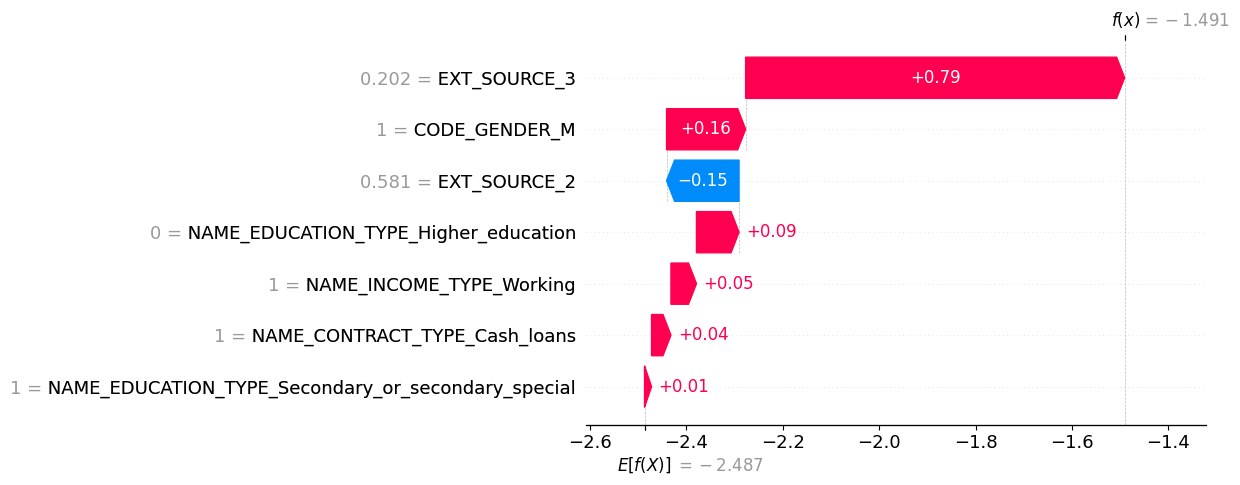

Expected class= 0
predicted probability= [0.45901853]


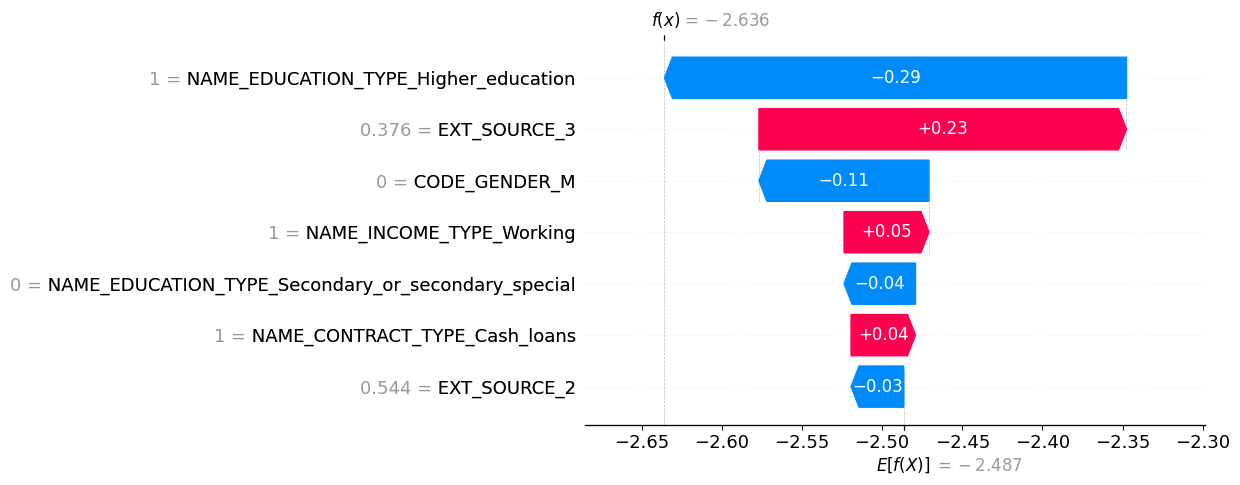

Expected class= 0
predicted probability= [0.3379564]


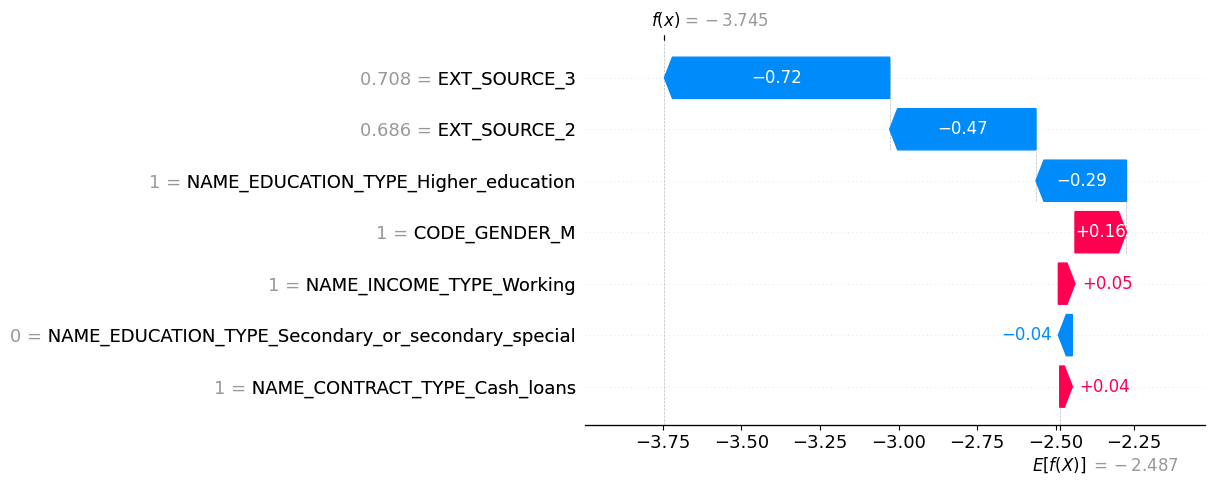

Expected class= 1
predicted probability= [0.44359335]


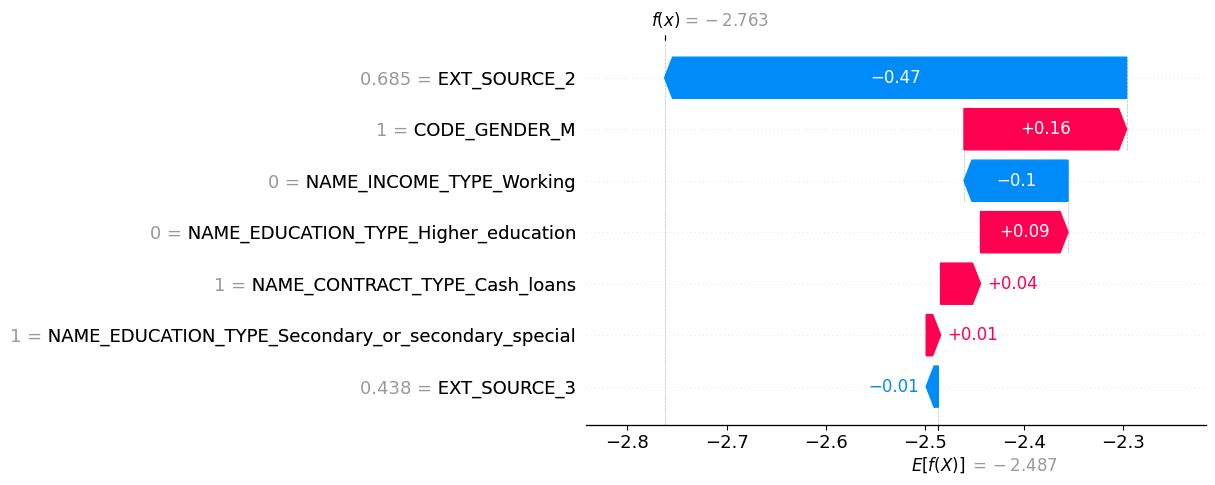

Expected class= 0
predicted probability= [0.3296032]


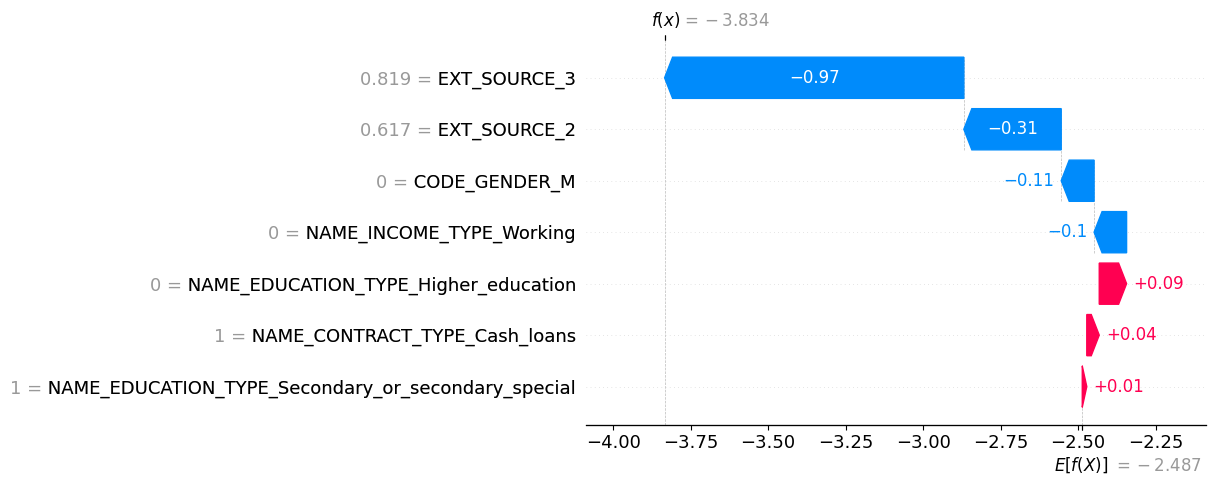

Expected class= 0
predicted probability= [0.6551919]


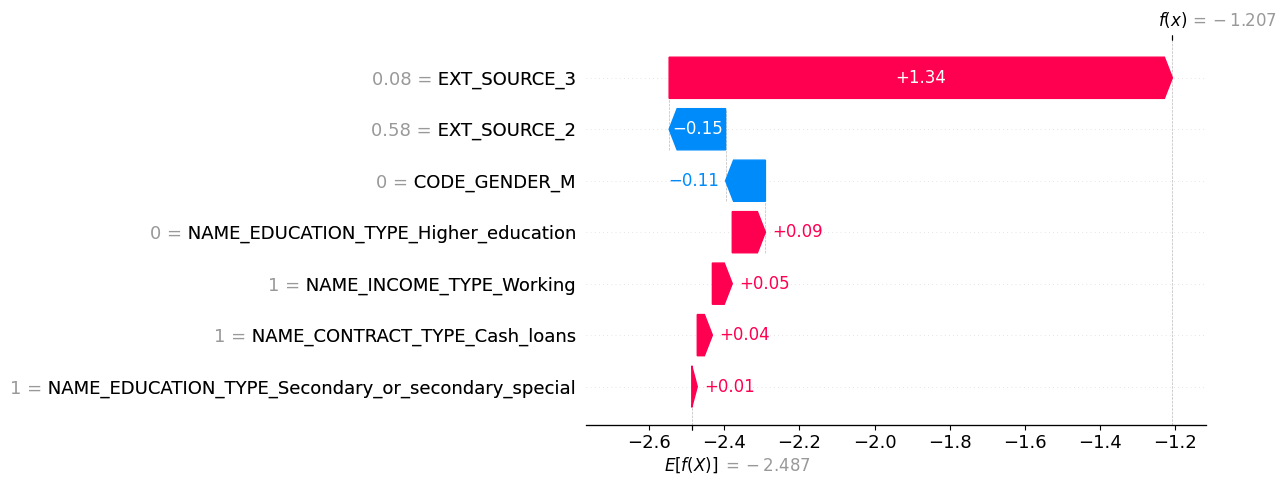

Expected class= 0
predicted probability= [0.43776947]


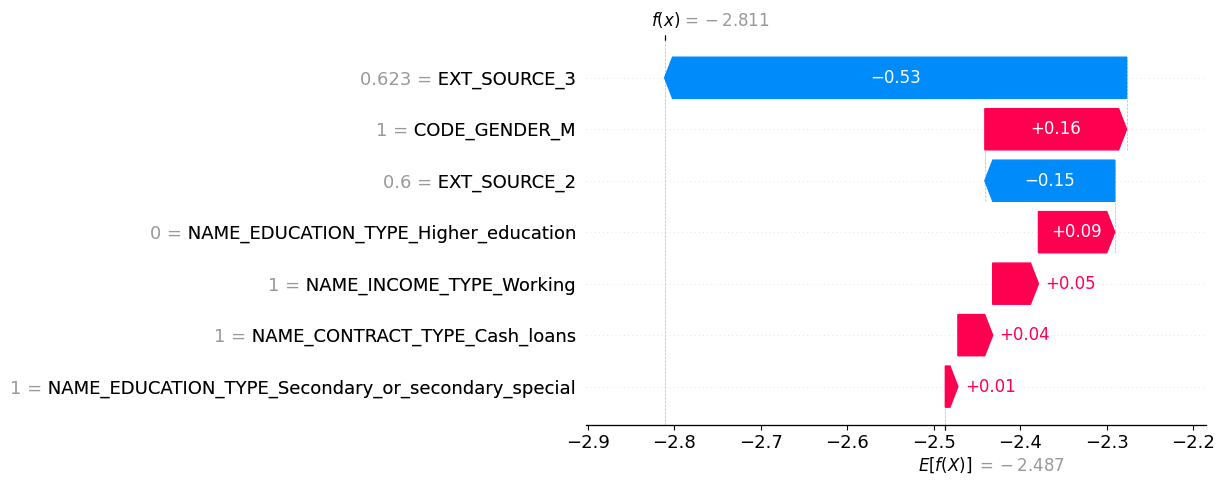

In [227]:
for idx in range(10) :
    df_X_sample1 = pd.DataFrame(df_X.iloc[idx]).T
    np_y_pred = model_prob.predict(df_X_sample1)
    print('Expected class=',  df_y.iloc[idx].values[0])
    print('predicted probability=', np_y_pred) #.round(3))
    shap.plots.waterfall(explainer(df_X)[idx], max_display=7)

# Fin du traitement

In [225]:
assert(False) # prevents the execution of following cells

AssertionError: 

# Annexes